<a href="https://colab.research.google.com/github/josealvarez97/TecunTecs-Math-Animations/blob/main/0-Trapezoidal-Rule/trapezoidal_rule_animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [4]:
from manim import *


Manim Community v0.11.0

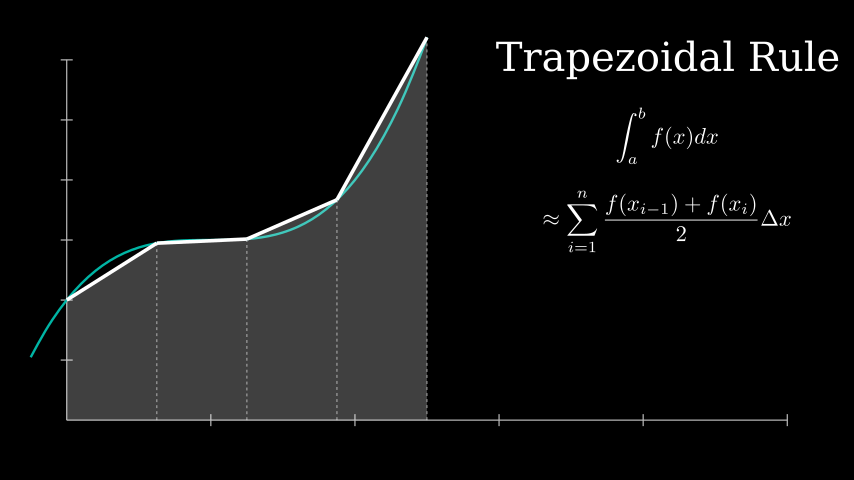

In [11]:
%%manim --format=gif -pql -s -v WARNING TrapezoidalRule
#--disable_caching
# %%writefile trapezoidal_rule_scene.py

from manim import *
TECUNTECS_COLOR = "#00b5a5"

class TrapezoidalRule(Scene):
  def construct(self):
    ft = Text("Trapezoidal Rule").shift((RIGHT*4 + UP*3))
    tex = Tex(r"$$\int_a^b f(x)dx$$ $$\approx \sum^n_{i=1}\frac{f(x_{i-1})+f(x_{i})}{2}\Delta x$$",
              font_size=36).shift((RIGHT*4 + UP*1))
    self.add(ft,tex)

    ax = Axes(
        x_range=[0,5],
        y_range=[0,6],
        tips=False
    )
    func = lambda x: (x-1)**3 + 3
    curve = ax.get_graph(func, 
                        x_range=[-0.25,2.5],
                        color=TECUNTECS_COLOR)
    self.add(ax, curve)

    def get_line_segment_func(x1,y1,x2,y2):
      m = (y2-y1)/(x2-x1)
      return lambda x: m*(x-x1)+y1

    n = 4
    a = 0
    b= 2.5
    dx = (b-a)/n
    for i in range(n):
      x_i = dx*i
      arrow = Line(ax.coords_to_point(dx*i,func(dx*i)),
                   ax.coords_to_point(dx*(i+1),func(dx*(i+1))),
                   stroke_width=6).set_stroke(WHITE)
      self.play(Create(arrow))

      line_segment_func = get_line_segment_func(dx*i, func(dx*i),
                                                dx*(i+1), func(dx*(i+1)))
      line_segment = ax.get_graph(line_segment_func,
                                  x_range=[dx*i,dx*(i+1)])
         
      area = ax.get_area(line_segment, [dx*i,dx*(i+1)],
                         color=WHITE, opacity=0)

      vline = ax.get_vertical_line(ax.i2gp(dx*(i+1), curve))
      vline.set_stroke(WHITE, opacity=0)

      self.play(area.animate.set_fill(WHITE, opacity=0.25),
                vline.animate.set_stroke(WHITE, opacity=0.5))
      self.wait(1)

    self.wait(3)

In [10]:
# !manim --format=gif -pqh --disable_caching trapezoidal_rule_scene.py TrapezoidalRule

Manim Community v0.11.0

[11/01/21 18:21:03] INFO     Caching disabled.             ]8;id=953120;file:///usr/local/lib/python3.7/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:100
[11/01/21 18:21:06] INFO     Animation 0 : Partial      ]8;id=341944;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:444
                             movie file written in '/co                         
                             ntent/media/videos/trapezo                         
                             idal_rule_scene/1080p60/pa                         
                             rtial_movie_files/Trapezoi                         
                             dalRule/uncached_00000.mp4                         
                             '                                                  
                    INFO     Caching disabled.             ]8;id=862106;file:///usr/local/lib/python3.7/dist-packages/manim/